In [1]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [4]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [5]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
models = np.array_split(train_data, 10)
train_x=[]
train_y=[]
for model_num in range(10):
    train_x.append(models[model_num][:, 0])
    train_y.append(models[model_num][:, 1])
train_x =np.array(train_x)
train_y=np.array(train_y)
bias=[]
vari=[]
err=[]
ierr=[]

In [6]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [7]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean(np.abs(mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        ierr.append(err[degree-1]-bias[degree-1]**2-vari[degree-1])
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias": bias,"Bias Square": np.array(bias)**2 ,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [8]:
table = bias_var()

 Degree        Bias    Bias Square       Variance  Mean Squared Error  Irreducible Error
      1  819.899483  672235.162075   23418.684768        1.026151e+06      330497.555035
      2  811.053859  657808.362335   33389.521117        9.860307e+05      294832.805375
      3   68.308270    4666.019711   58659.338705        6.756753e+04        4242.166666
      4   79.588217    6334.284236  100410.748516        1.093902e+05        2645.146898
      5   77.293306    5974.255128  102554.652609        1.107432e+05        2214.267536
      6   77.319243    5978.265268  120022.729822        1.282871e+05        2286.063326
      7   82.088965    6738.598155  155449.696740        1.648781e+05        2689.777988
      8   80.650929    6504.572281  172552.133768        1.816569e+05        2600.241812
      9   82.104769    6741.193054  208423.083377        2.171275e+05        1963.196337
     10   87.425775    7643.266128  218546.771925        2.288097e+05        2619.693092
     11   85.543919  

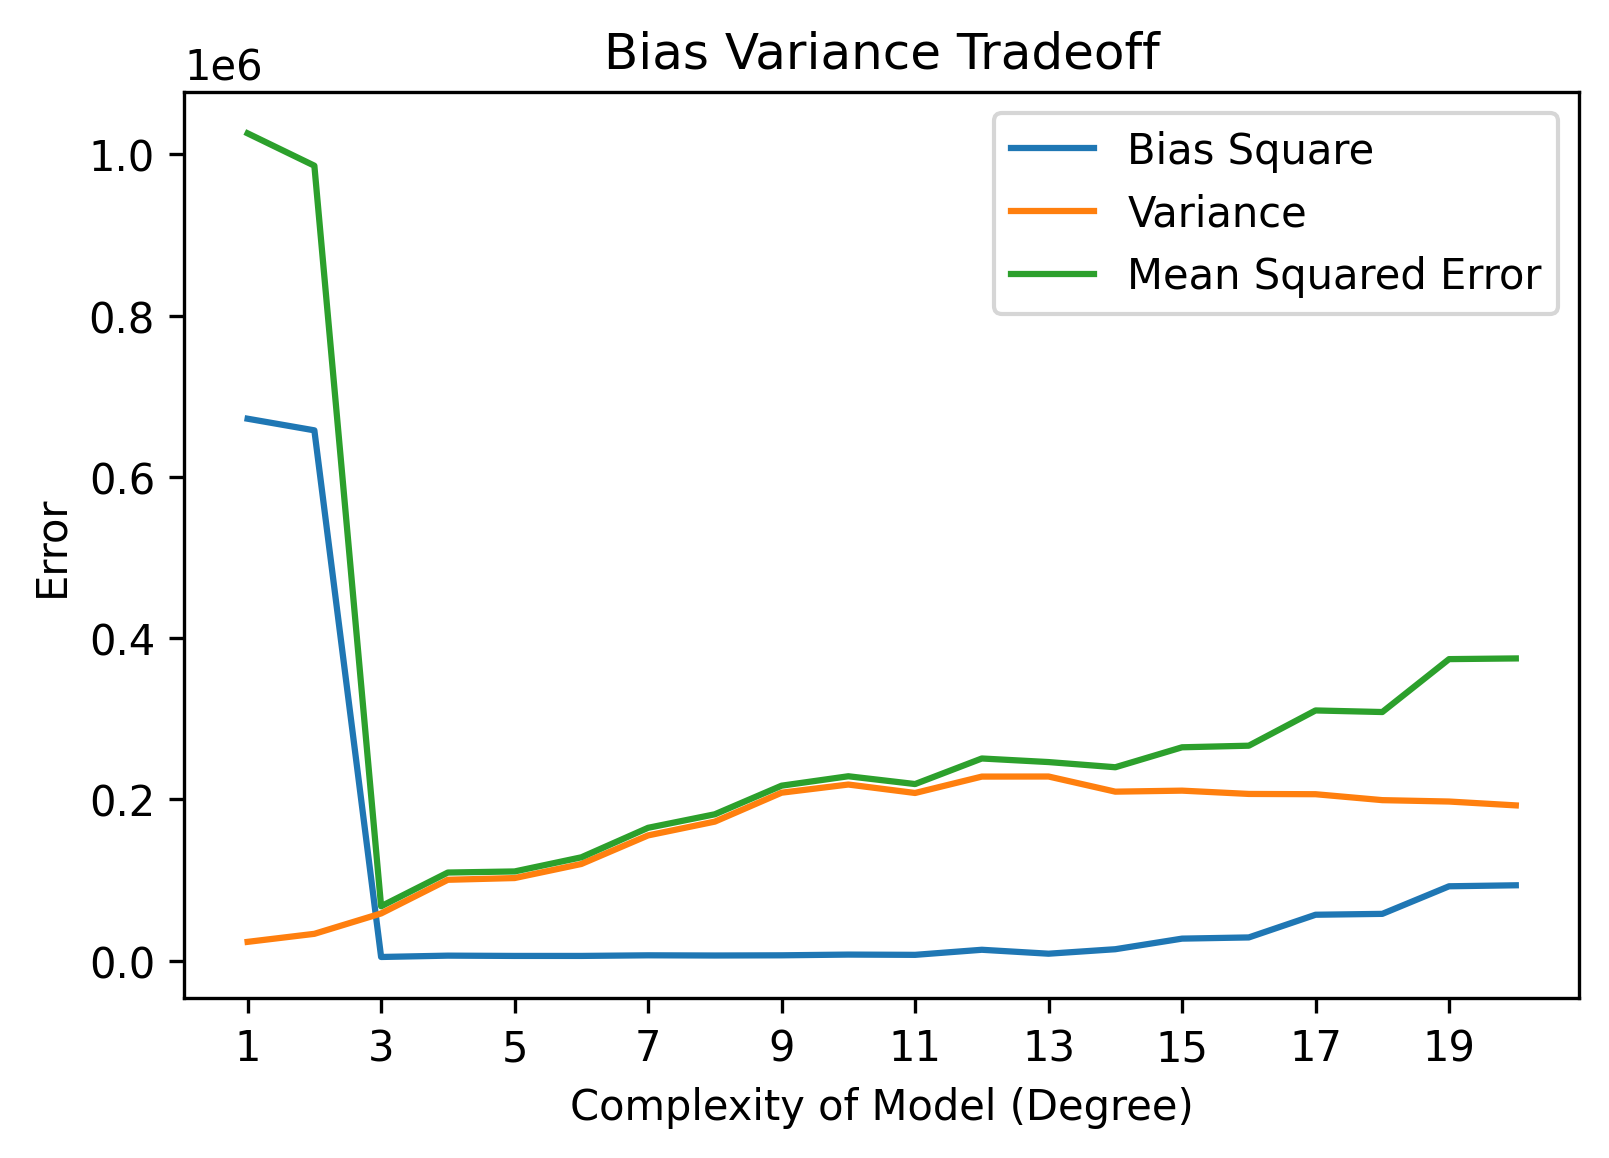

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.xlabel("Complexity of Model (Degree)")
plt.ylabel("Error")
plt.title("Bias Variance Tradeoff")
plt.legend()
plt.show()

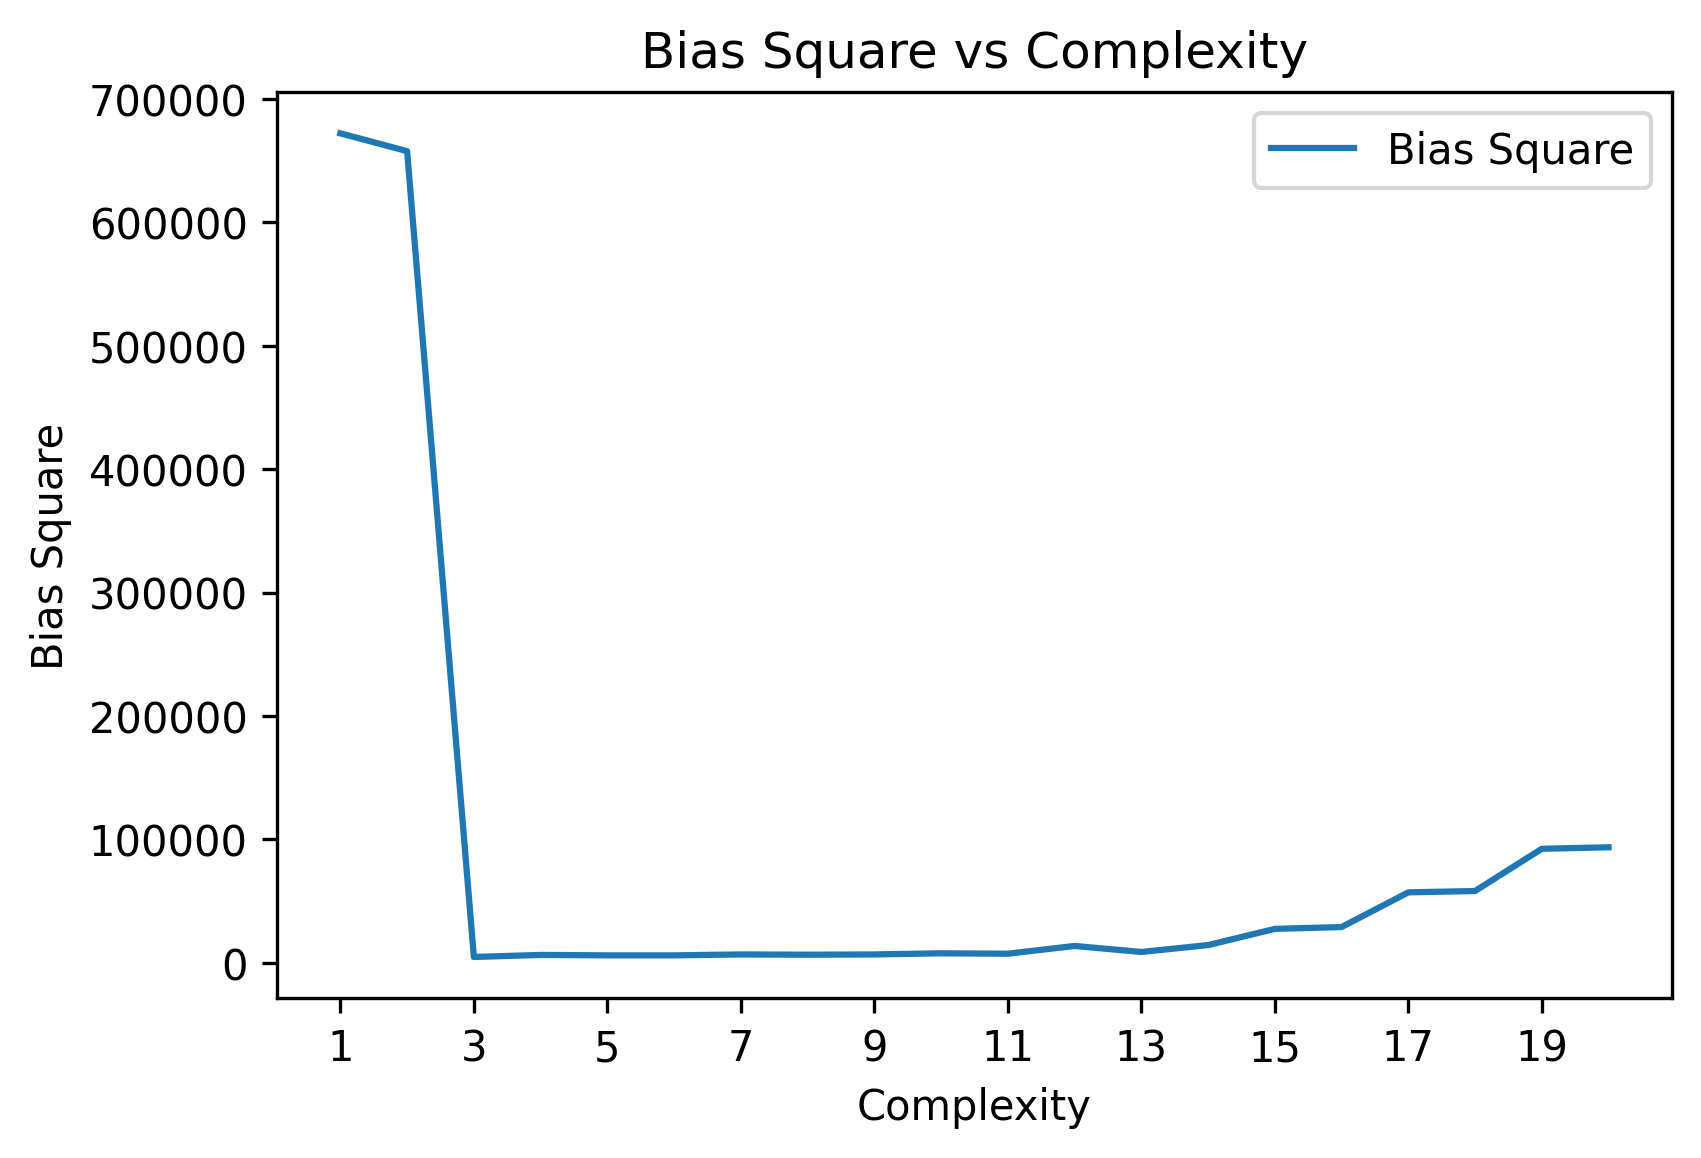

In [10]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.title("Bias Square vs Complexity")
plt.xlabel("Complexity")
plt.ylabel("Bias Square")
plt.legend()
plt.show()

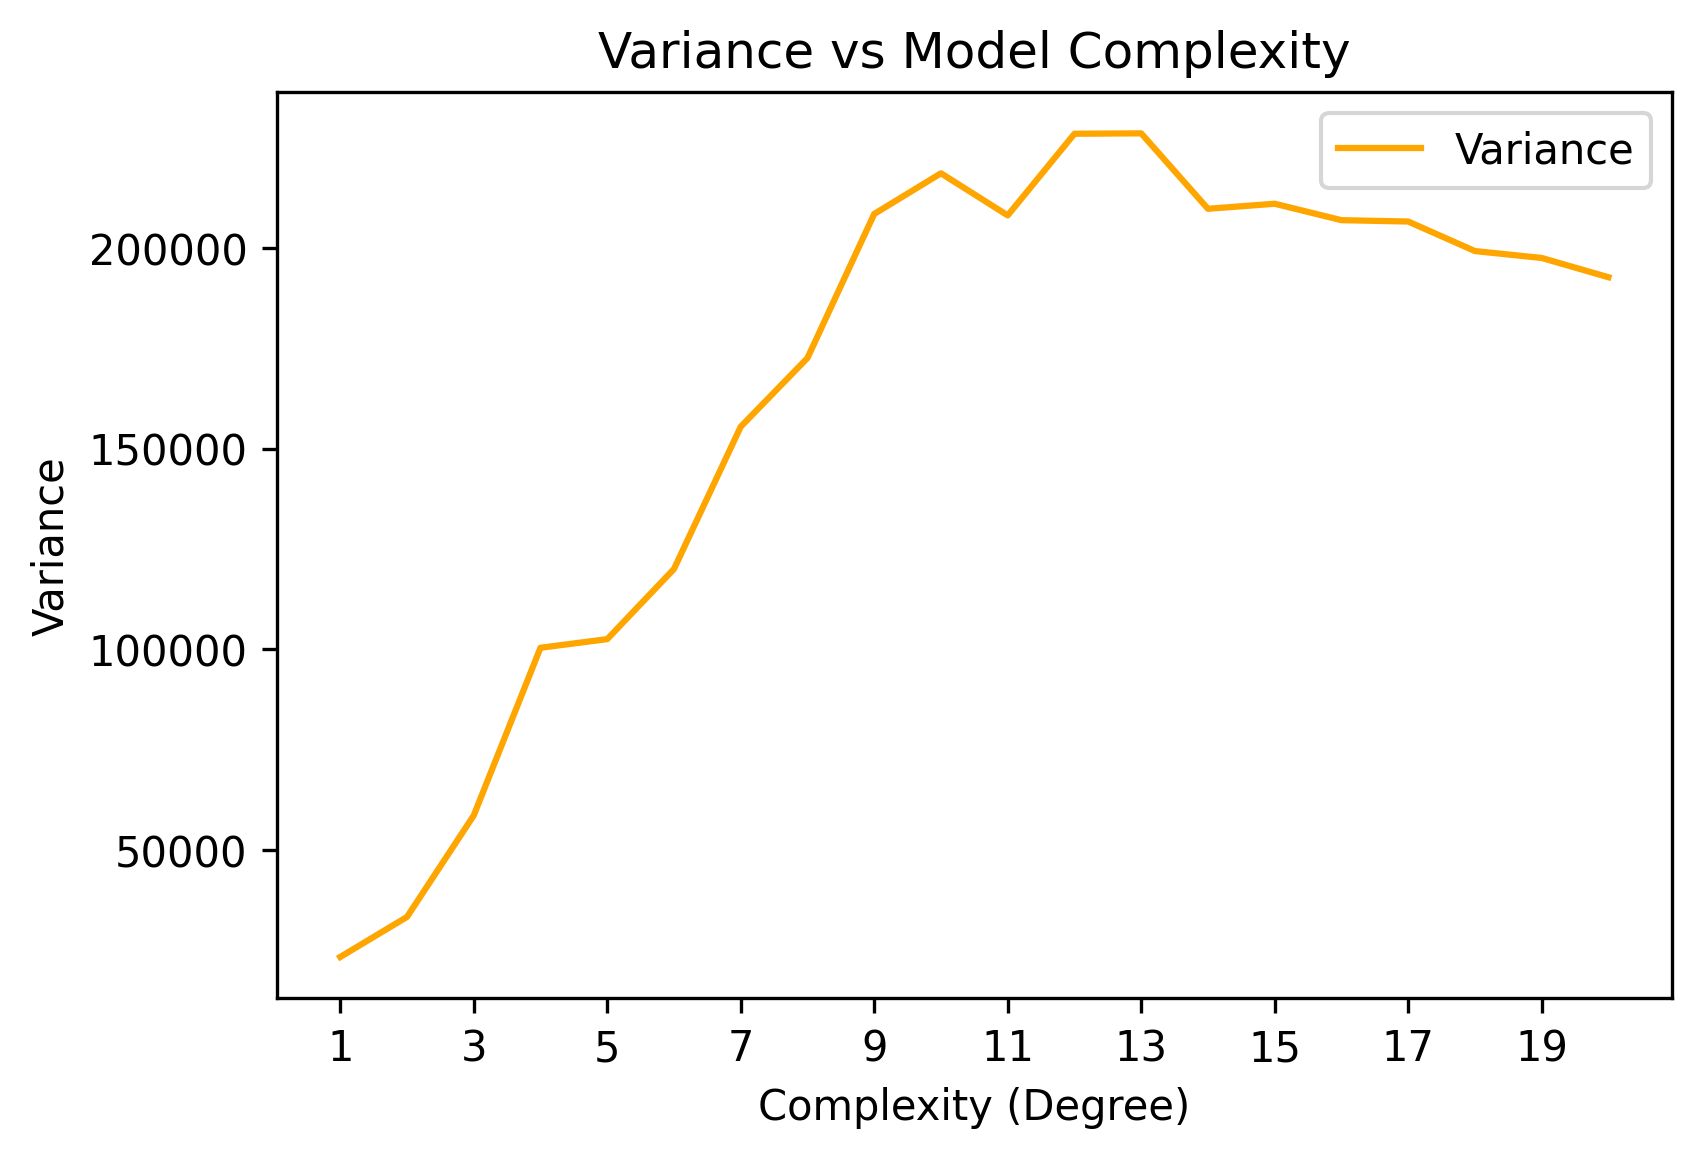

In [11]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance", color="orange")
plt.title("Variance vs Model Complexity")
plt.xlabel("Complexity (Degree)")
plt.ylabel("Variance")
plt.legend()
plt.show()

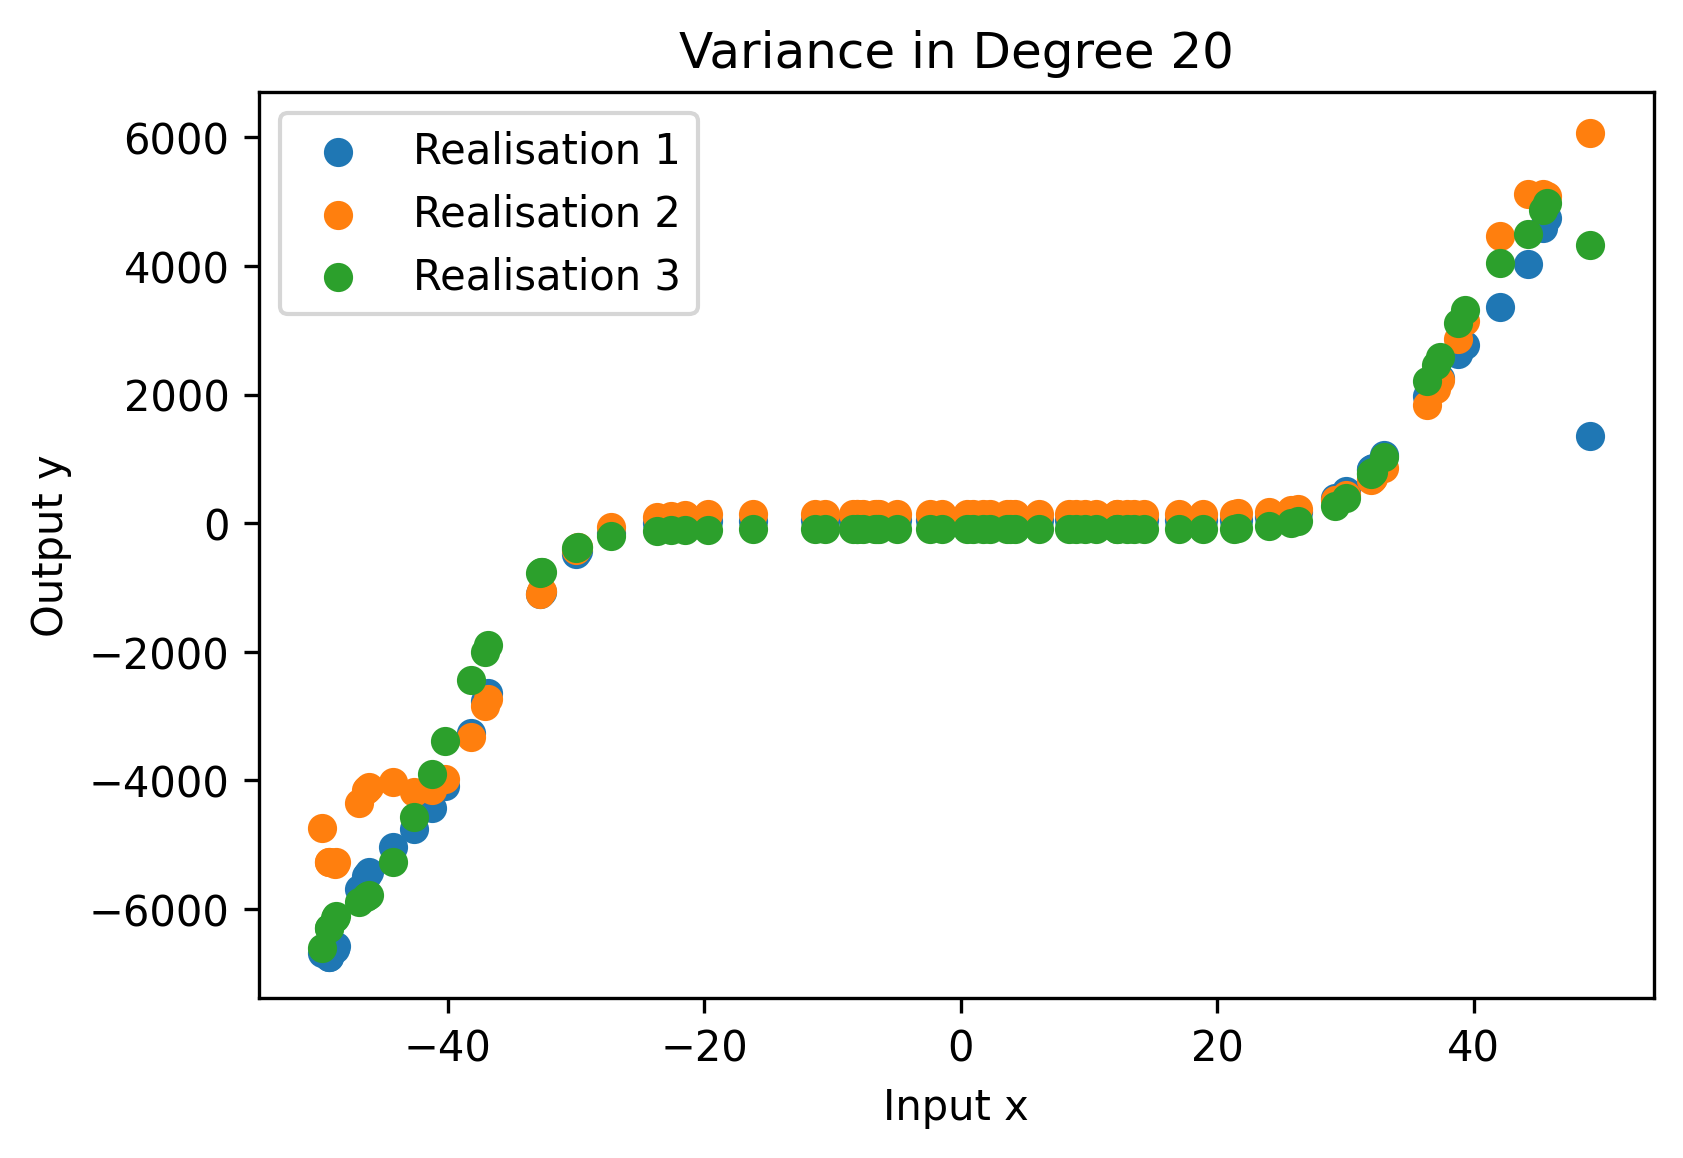

In [12]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.scatter(test_x,output[19][0],label="Realisation 1")
plt.scatter(test_x,output[19][1],label="Realisation 2")
plt.scatter(test_x,output[19][2],label="Realisation 3")
plt.title("Variance in Degree 20")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.legend()
plt.show()

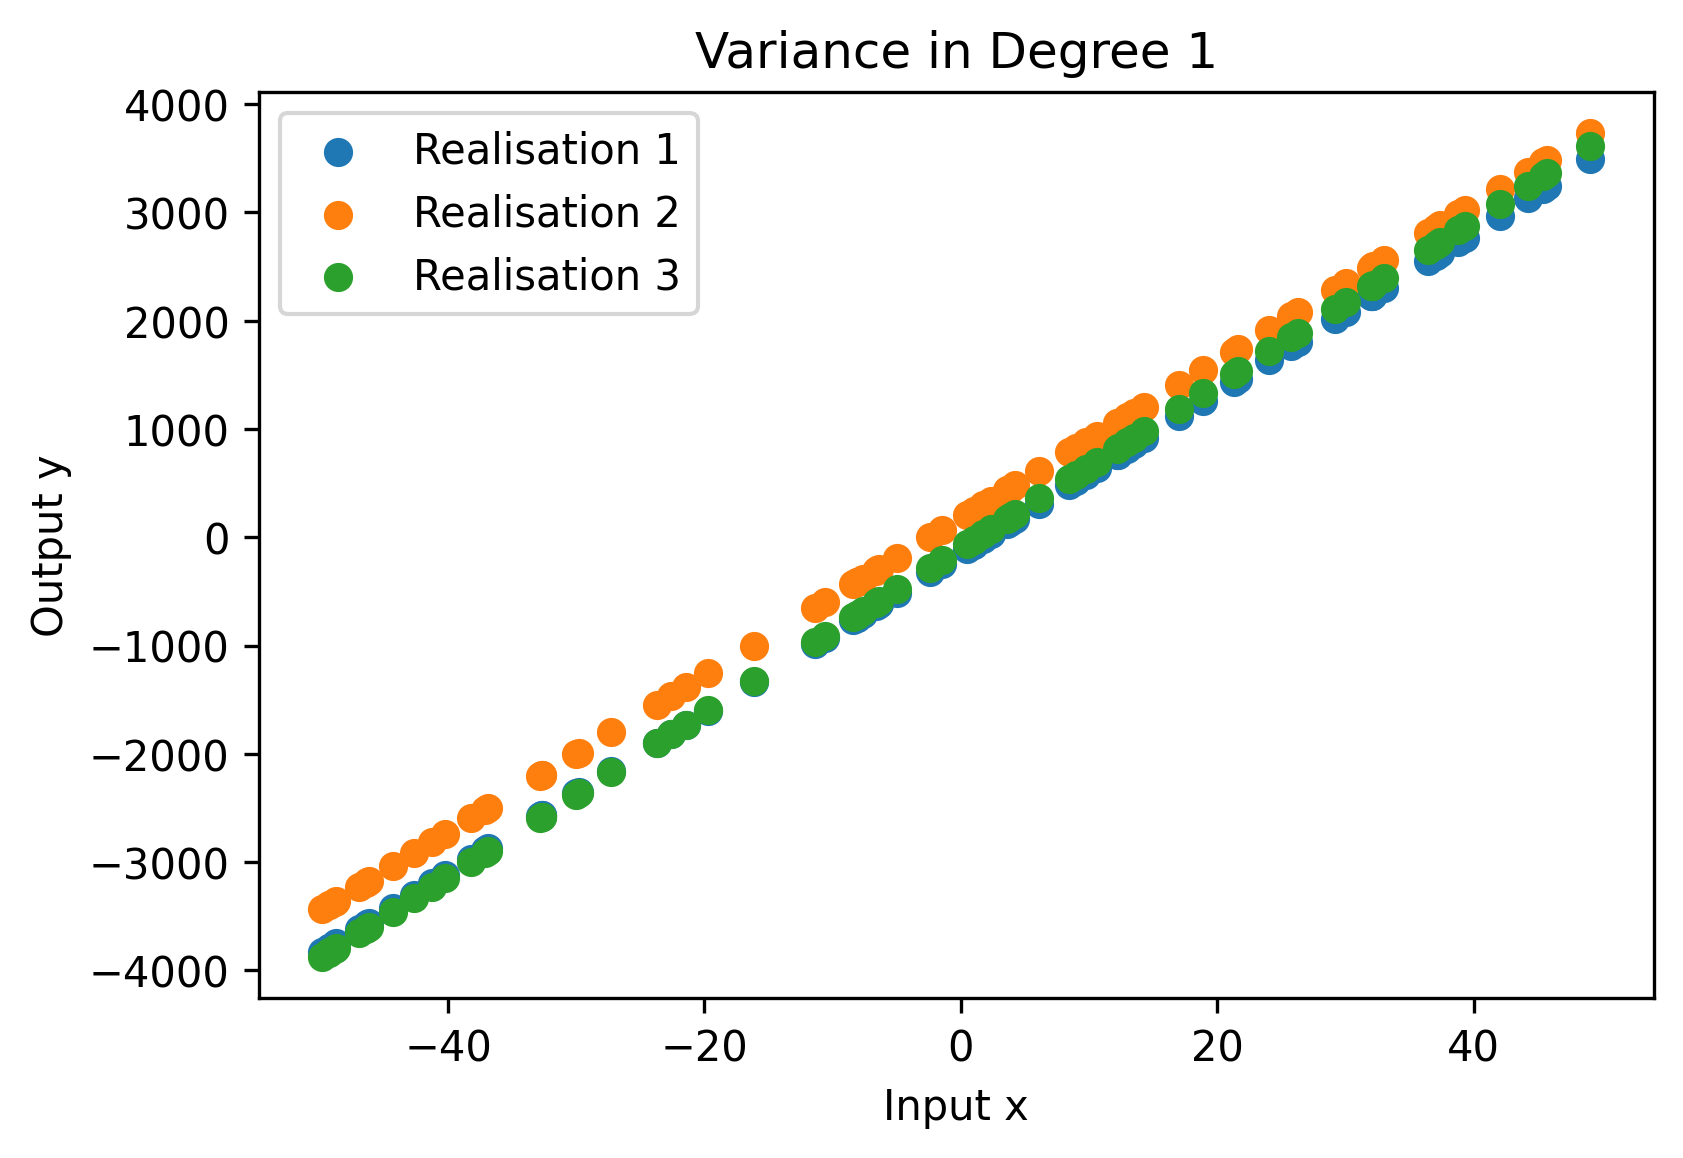

In [13]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.scatter(test_x,output[0][0],label="Realisation 1")
plt.scatter(test_x,output[0][1],label="Realisation 2")
plt.scatter(test_x,output[0][2],label="Realisation 3")
plt.title("Variance in Degree 1")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.legend()
plt.show()

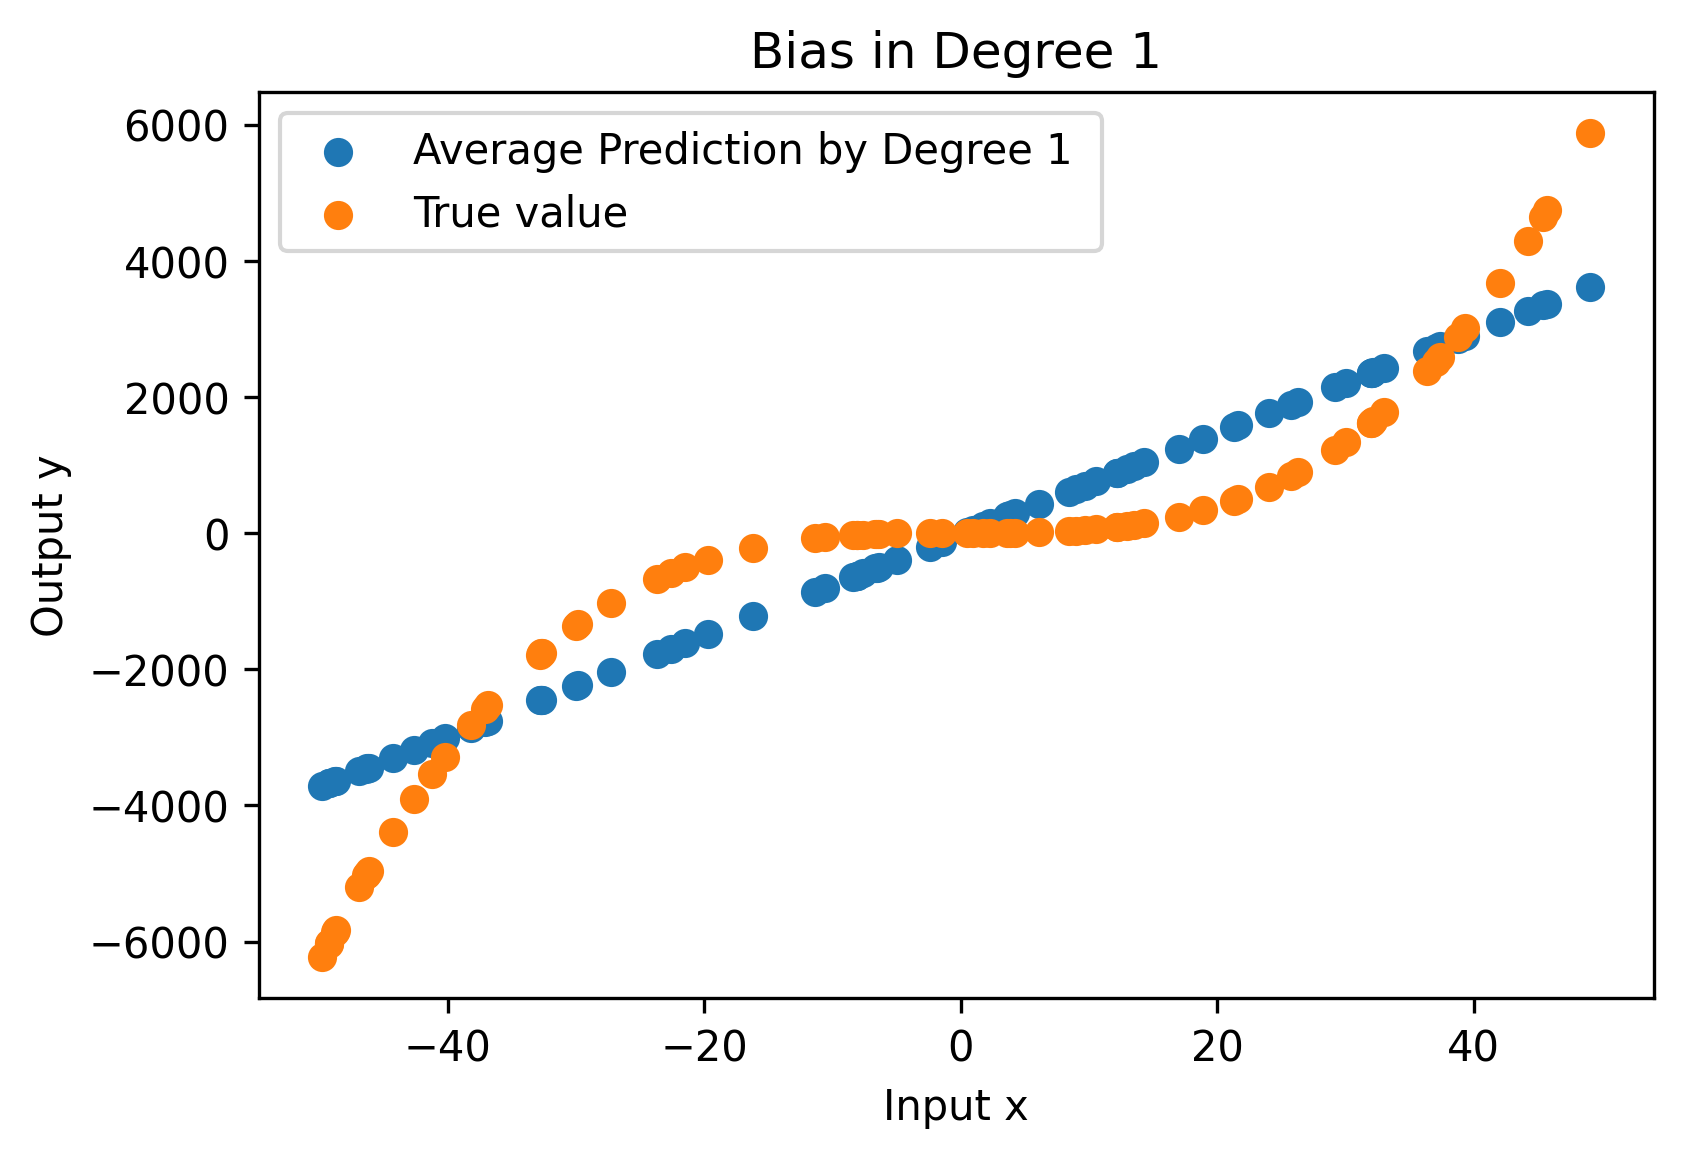

In [14]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.scatter(test_x,np.mean(output[0],axis =0),label="Average Prediction by Degree 1 ")
plt.scatter(test_x,test_y,label="True value")
plt.title("Bias in Degree 1")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.legend()
plt.show()

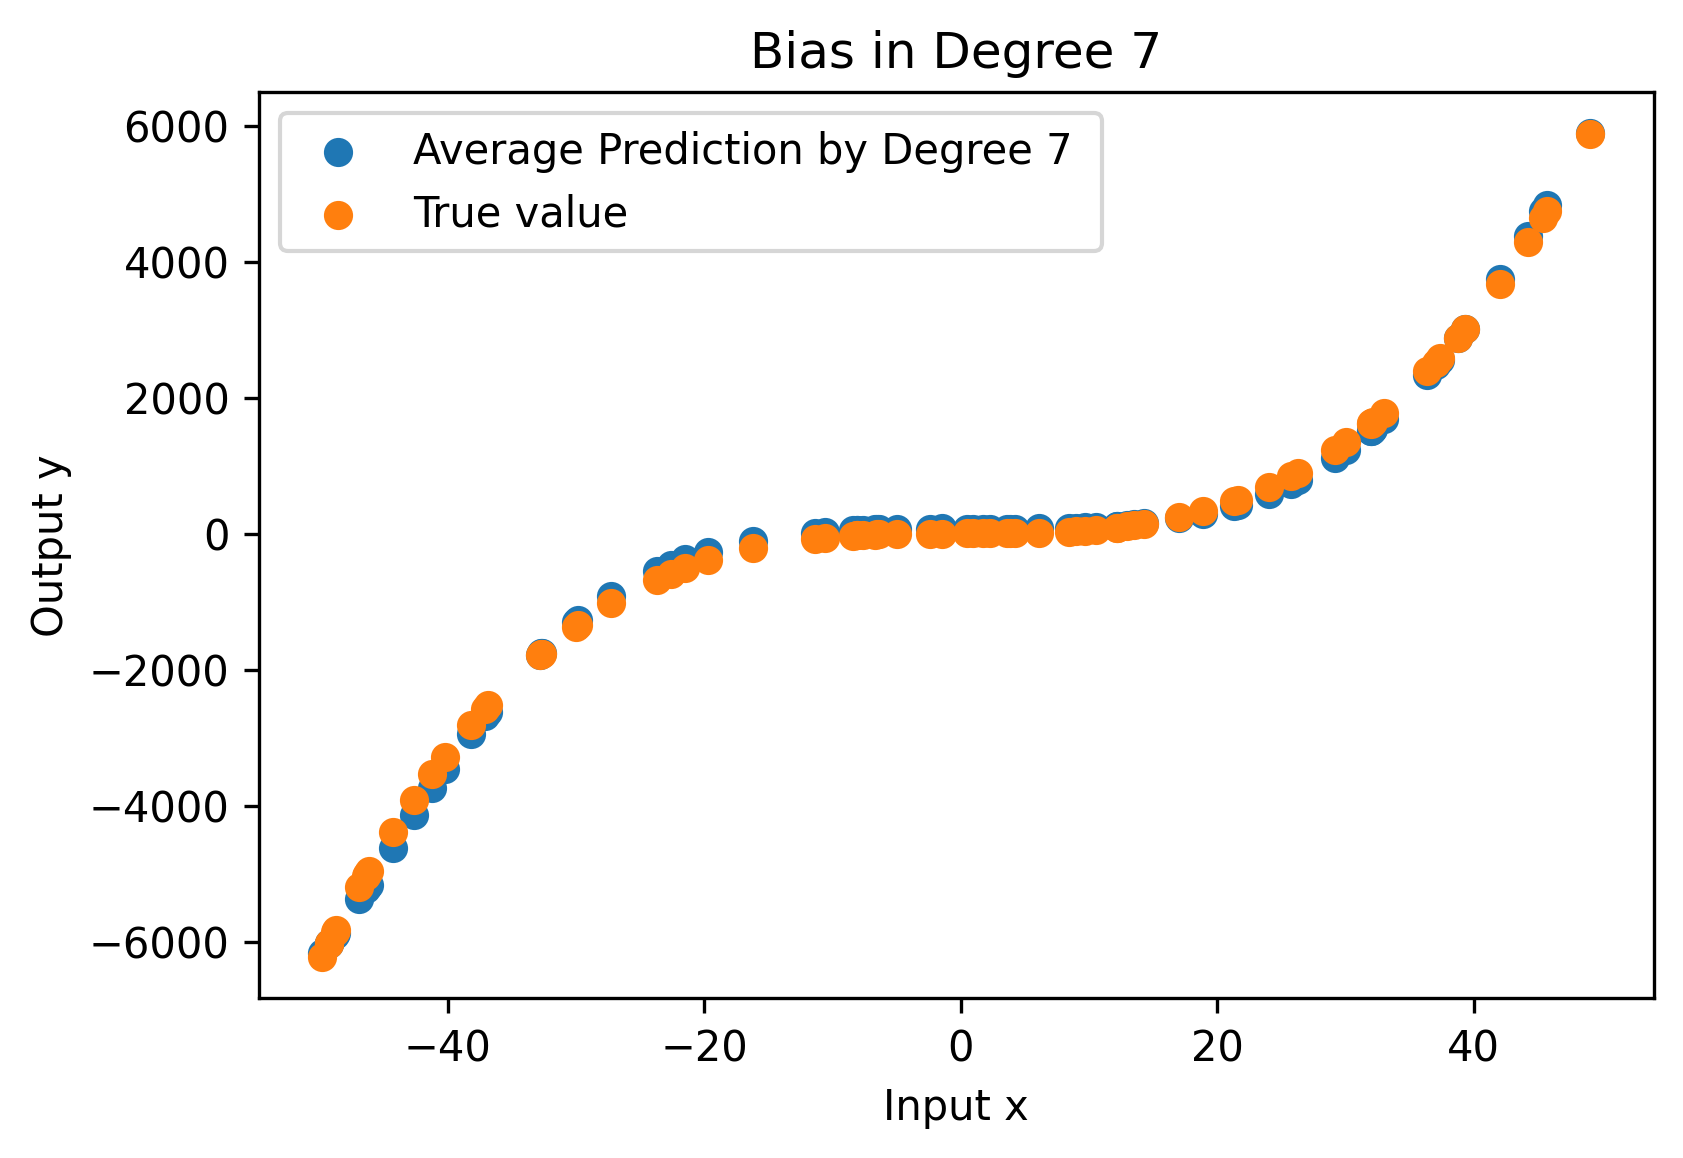

In [15]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.scatter(test_x,np.mean(output[6],axis =0),label="Average Prediction by Degree 7 ")
plt.scatter(test_x,test_y,label="True value")
plt.title("Bias in Degree 7")
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.legend()
plt.show()